In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


TIME = 'time'
LOAD = 'load'

SEPARATOR = '------------------------------------------------------------------------------------------------'

In [2]:
# Read into dataframe
df = pd.read_csv('ireland-merged.csv',  parse_dates=[TIME])
df = df.set_index(df[TIME]).drop(columns=TIME)
df.head()

load  rain  temp  year  month  day  day_of_week  day_of_year  \
time                                                                       
2015-01-01  2803   0.4  10.7  2015      1    1            3            1   
2015-01-02  3029   0.0   6.1  2015      1    2            4            2   
2015-01-03  2980   0.4   4.6  2015      1    3            5            3   
2015-01-04  2917   0.0   5.5  2015      1    4            6            4   
2015-01-05  3328   0.1   9.5  2015      1    5            0            5   

            weekend  month_sin  month_cos  day_sin  day_cos  day_of_week_sin  \
time                                                                           
2015-01-01        0        0.5      0.866    0.201    0.980            0.434   
2015-01-02        0        0.5      0.866    0.394    0.919           -0.434   
2015-01-03        1        0.5      0.866    0.571    0.821           -0.975   
2015-01-04        1        0.5      0.866    0.725    0.689           -0.782   
2015-01-05        0        0.5      0.866    0.849    0.529            0.000   

            day_of_week_cos  day_of_year_sin  day_of_year_cos  
time                                                           
2015-01-01           -0.901            0.017            1.000  
2015-01-02           -0.901            0.034            0.999  
2015-01-03           -0.223            0.051            0.999  
2015-01-04            0.623            0.069            0.998  
2015-01-05            1.000            0.086            0.996

In [28]:
# Split the data set

# Train with 2015-2018.
df_train = df['2015-01-01':'2018-12-31']
# for graph 2015
df2015 = df['2015-01-01':'2015-12-31']
# for graph 2016
df2016= df['2016-01-01':'2016-12-31']
# for graph 2017
df2017= df['2017-01-01':'2017-12-31']
# for graph 2018
df2018= df['2018-01-01':'2018-12-31']

# Test with 2019.
df_test  = df['2019-01-01':'2019-12-31']

# print("Train head\n", df_train.head())
# print("Train tail\n", df_train.tail())

# print("Test head\n", df_test.head())
# print("Train tail\n", df_test.tail())

In [4]:
def predict(x_train, y_train, x_test, regressor):
    '''Train a model. Return train and test predictions.'''
    
    lm = regressor.fit(x_train, y_train)
    
    y_train_predict = lm.predict(x_train)
    y_test_predict = lm.predict(x_test)
    
    return y_train_predict, y_test_predict

def mse(title, y_true, y_pred):
    '''Print the MSE.'''
    print(title, mean_squared_error(y_true, y_pred))

def score(features, y_train_true, y_train_predict, y_test_true, y_test_predict, regressor):
    '''Print the training and test scores.'''
    print("Features:  ", features)
    mse("Train MSE: ", y_train_true, y_train_predict)
    mse("Test MSE:  ", y_test_true, y_test_predict)
    print()

def evaluate(df_train, df_test, features, regressor):
    '''Train and score a regression model.'''
    
    x_train = df_train[features]
    x_test = df_test[features]
    
    y_train = df_train[LOAD]
    y_test = df_test[LOAD]
    
    y_train_predict, y_test_predict = predict(x_train, y_train, x_test, regressor)
    score(features, y_train, y_train_predict, y_test, y_test_predict, regressor)

def evaluate_features(df_train, df_test, features, regressor):
    '''Train and score a regression model for each of the given features list.'''
    
    # Print the algorithm used.
    print(regressor if (type(regressor) is str) else type(regressor))
    print()
    
    for f in features:
        evaluate(df_train, df_test, f, regressor)
        
    print(SEPARATOR)

In [5]:
# Build linear regression model with different features and compare their MSE.

# Baseline. Always predict with mean load.
y_train_mean = [df_train[LOAD].mean()]*len(df_train)
y_test_mean = [df_test[LOAD].mean()]*len(df_test)
score(['avg'], df_train[LOAD], y_train_mean, df_test[LOAD], y_test_mean, "Always predict average")
print(SEPARATOR)

STARTING_FEATURES = ['rain','temp']
F1 = STARTING_FEATURES + ['year', 'month', 'day']
F2 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week']
F3 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week', 'weekend']
F4 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week', 'weekend'] + ['month_sin', 'month_cos']
F5 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week', 'weekend'] + ['month_sin', 'month_cos'] + ['day_of_week_sin', 'day_of_week_cos']
F6 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week', 'weekend'] + ['month_sin', 'month_cos'] + ['day_of_week_sin', 'day_of_week_cos'] + ['day_sin', 'day_cos']
F7 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week', 'weekend'] + ['month_sin', 'month_cos'] + ['day_of_week_sin', 'day_of_week_cos'] + ['day_sin', 'day_cos'] + ['day_of_year_sin', 'day_of_year_cos']

features = [STARTING_FEATURES,
            F1,
            F2,
            F3,
            F4,
            F5,
            F6,
            F7]

evaluate_features(df_train, df_test, features, LinearRegression())
evaluate_features(df_train, df_test, features, RandomForestRegressor(n_estimators = 1000, random_state = 42))


Features:   ['avg']
Train MSE:  90319.90645301684
Test MSE:   82969.37684368549

------------------------------------------------------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>

Features:   ['rain', 'temp']
Train MSE:  59022.20721700439
Test MSE:   77260.98650706449

Features:   ['rain', 'temp', 'year', 'month', 'day']
Train MSE:  47373.40237944257
Test MSE:   49919.78446636632

Features:   ['rain', 'temp', 'year', 'month', 'day', 'day_of_week']
Train MSE:  33738.57573907579
Test MSE:   37584.252089421476

Features:   ['rain', 'temp', 'year', 'month', 'day', 'day_of_week', 'weekend']
Train MSE:  24891.88790346573
Test MSE:   26984.482370419373

Features:   ['rain', 'temp', 'year', 'month', 'day', 'day_of_week', 'weekend', 'month_sin', 'month_cos']
Train MSE:  15575.73051814966
Test MSE:   19236.273378167785

Features:   ['rain', 'temp', 'year', 'month', 'day', 'day_of_week', 'weekend', 'month_sin', 'month_cos', 'day_of_week_sin', '

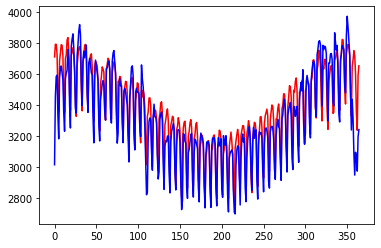

In [6]:
# Visualize test set prediction vs actual values.

features = F7

x_train = df_train[features]
x_test = df_test[features]

y_train = df_train[LOAD]
y_test = df_test[LOAD]

# print(y_test.to_numpy())
# print(y_test_predict)

y_train_predict, y_test_predict = predict(x_train, y_train, x_test, LinearRegression())

# Red - prediction
# Blue - actual
plt.plot(y_test_predict,'r', y_test.to_numpy() ,'b' )
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

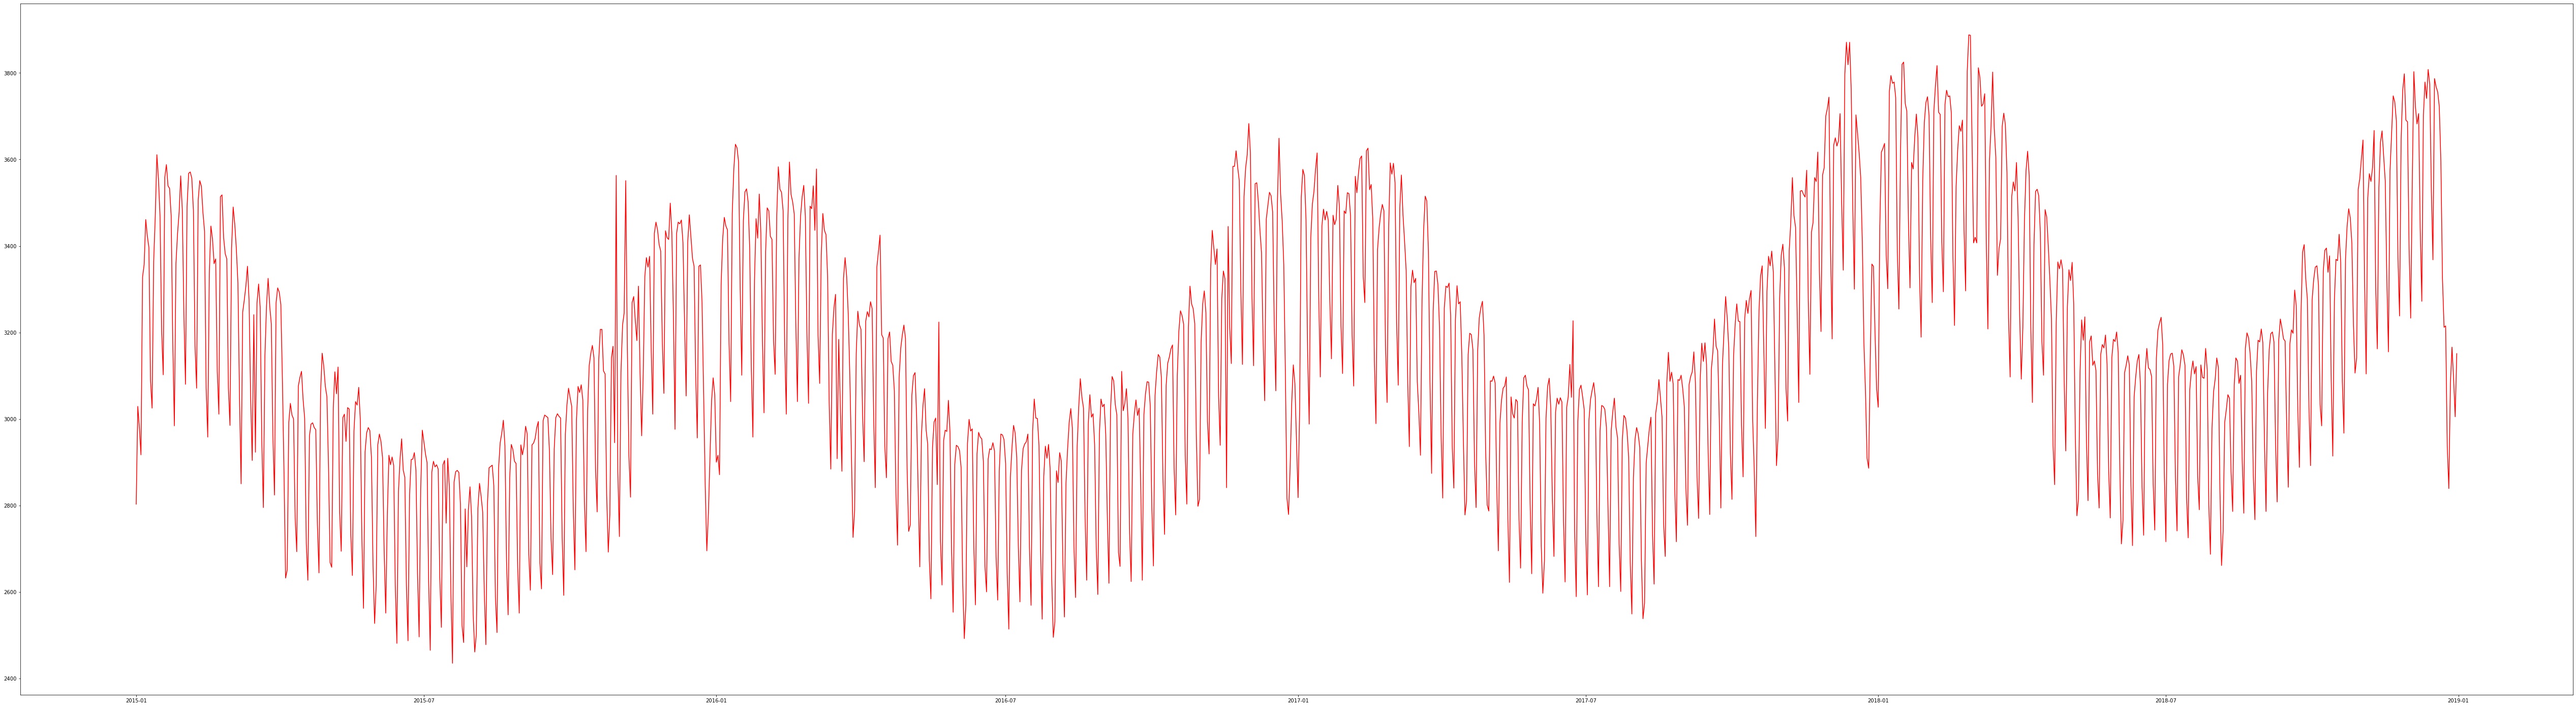

In [25]:
plt.plot(df_train.load ,'r')
plt.rcParams['figure.figsize'] = [90, 25]
plt.show()

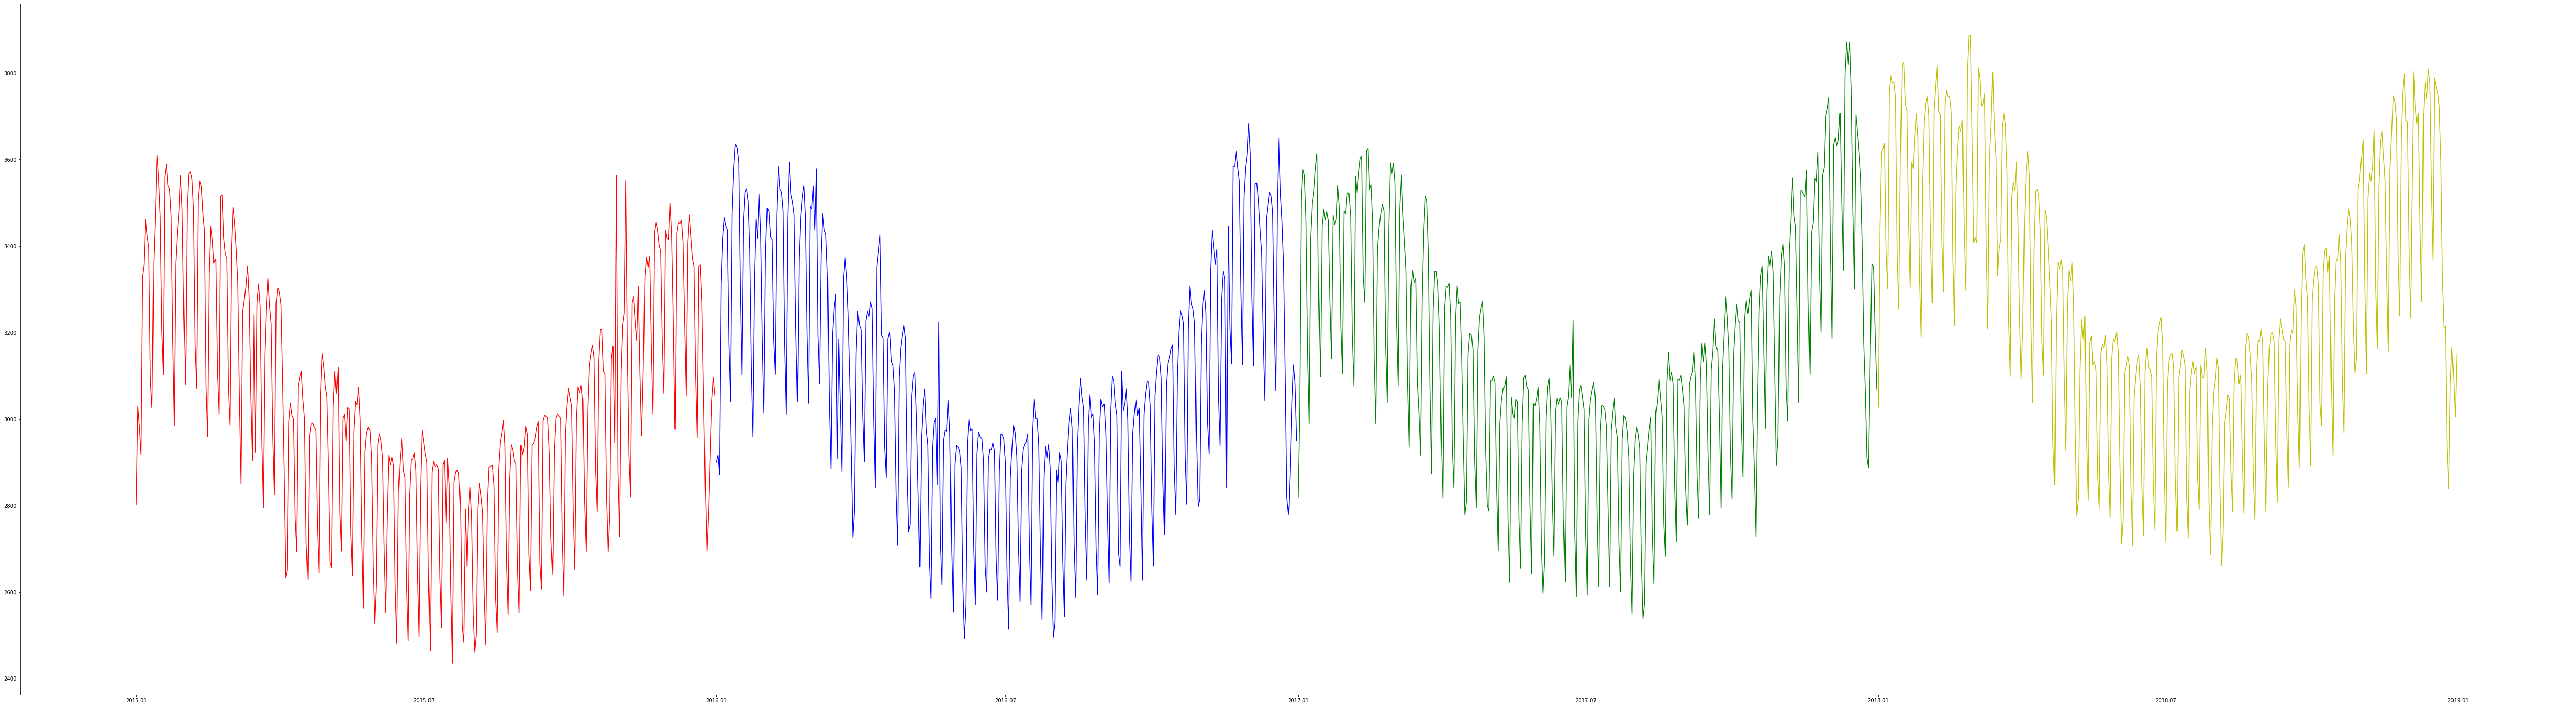

In [29]:
plt.plot(df2015.load ,'r',df2016.load ,'b',df2017.load ,'g',df2018.load ,'y',)
plt.rcParams['figure.figsize'] = [90, 25]
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df19 = pd.read_csv('forest-prediction-2019.csv')
df20 = pd.read_csv('forest-prediction-2020.csv')


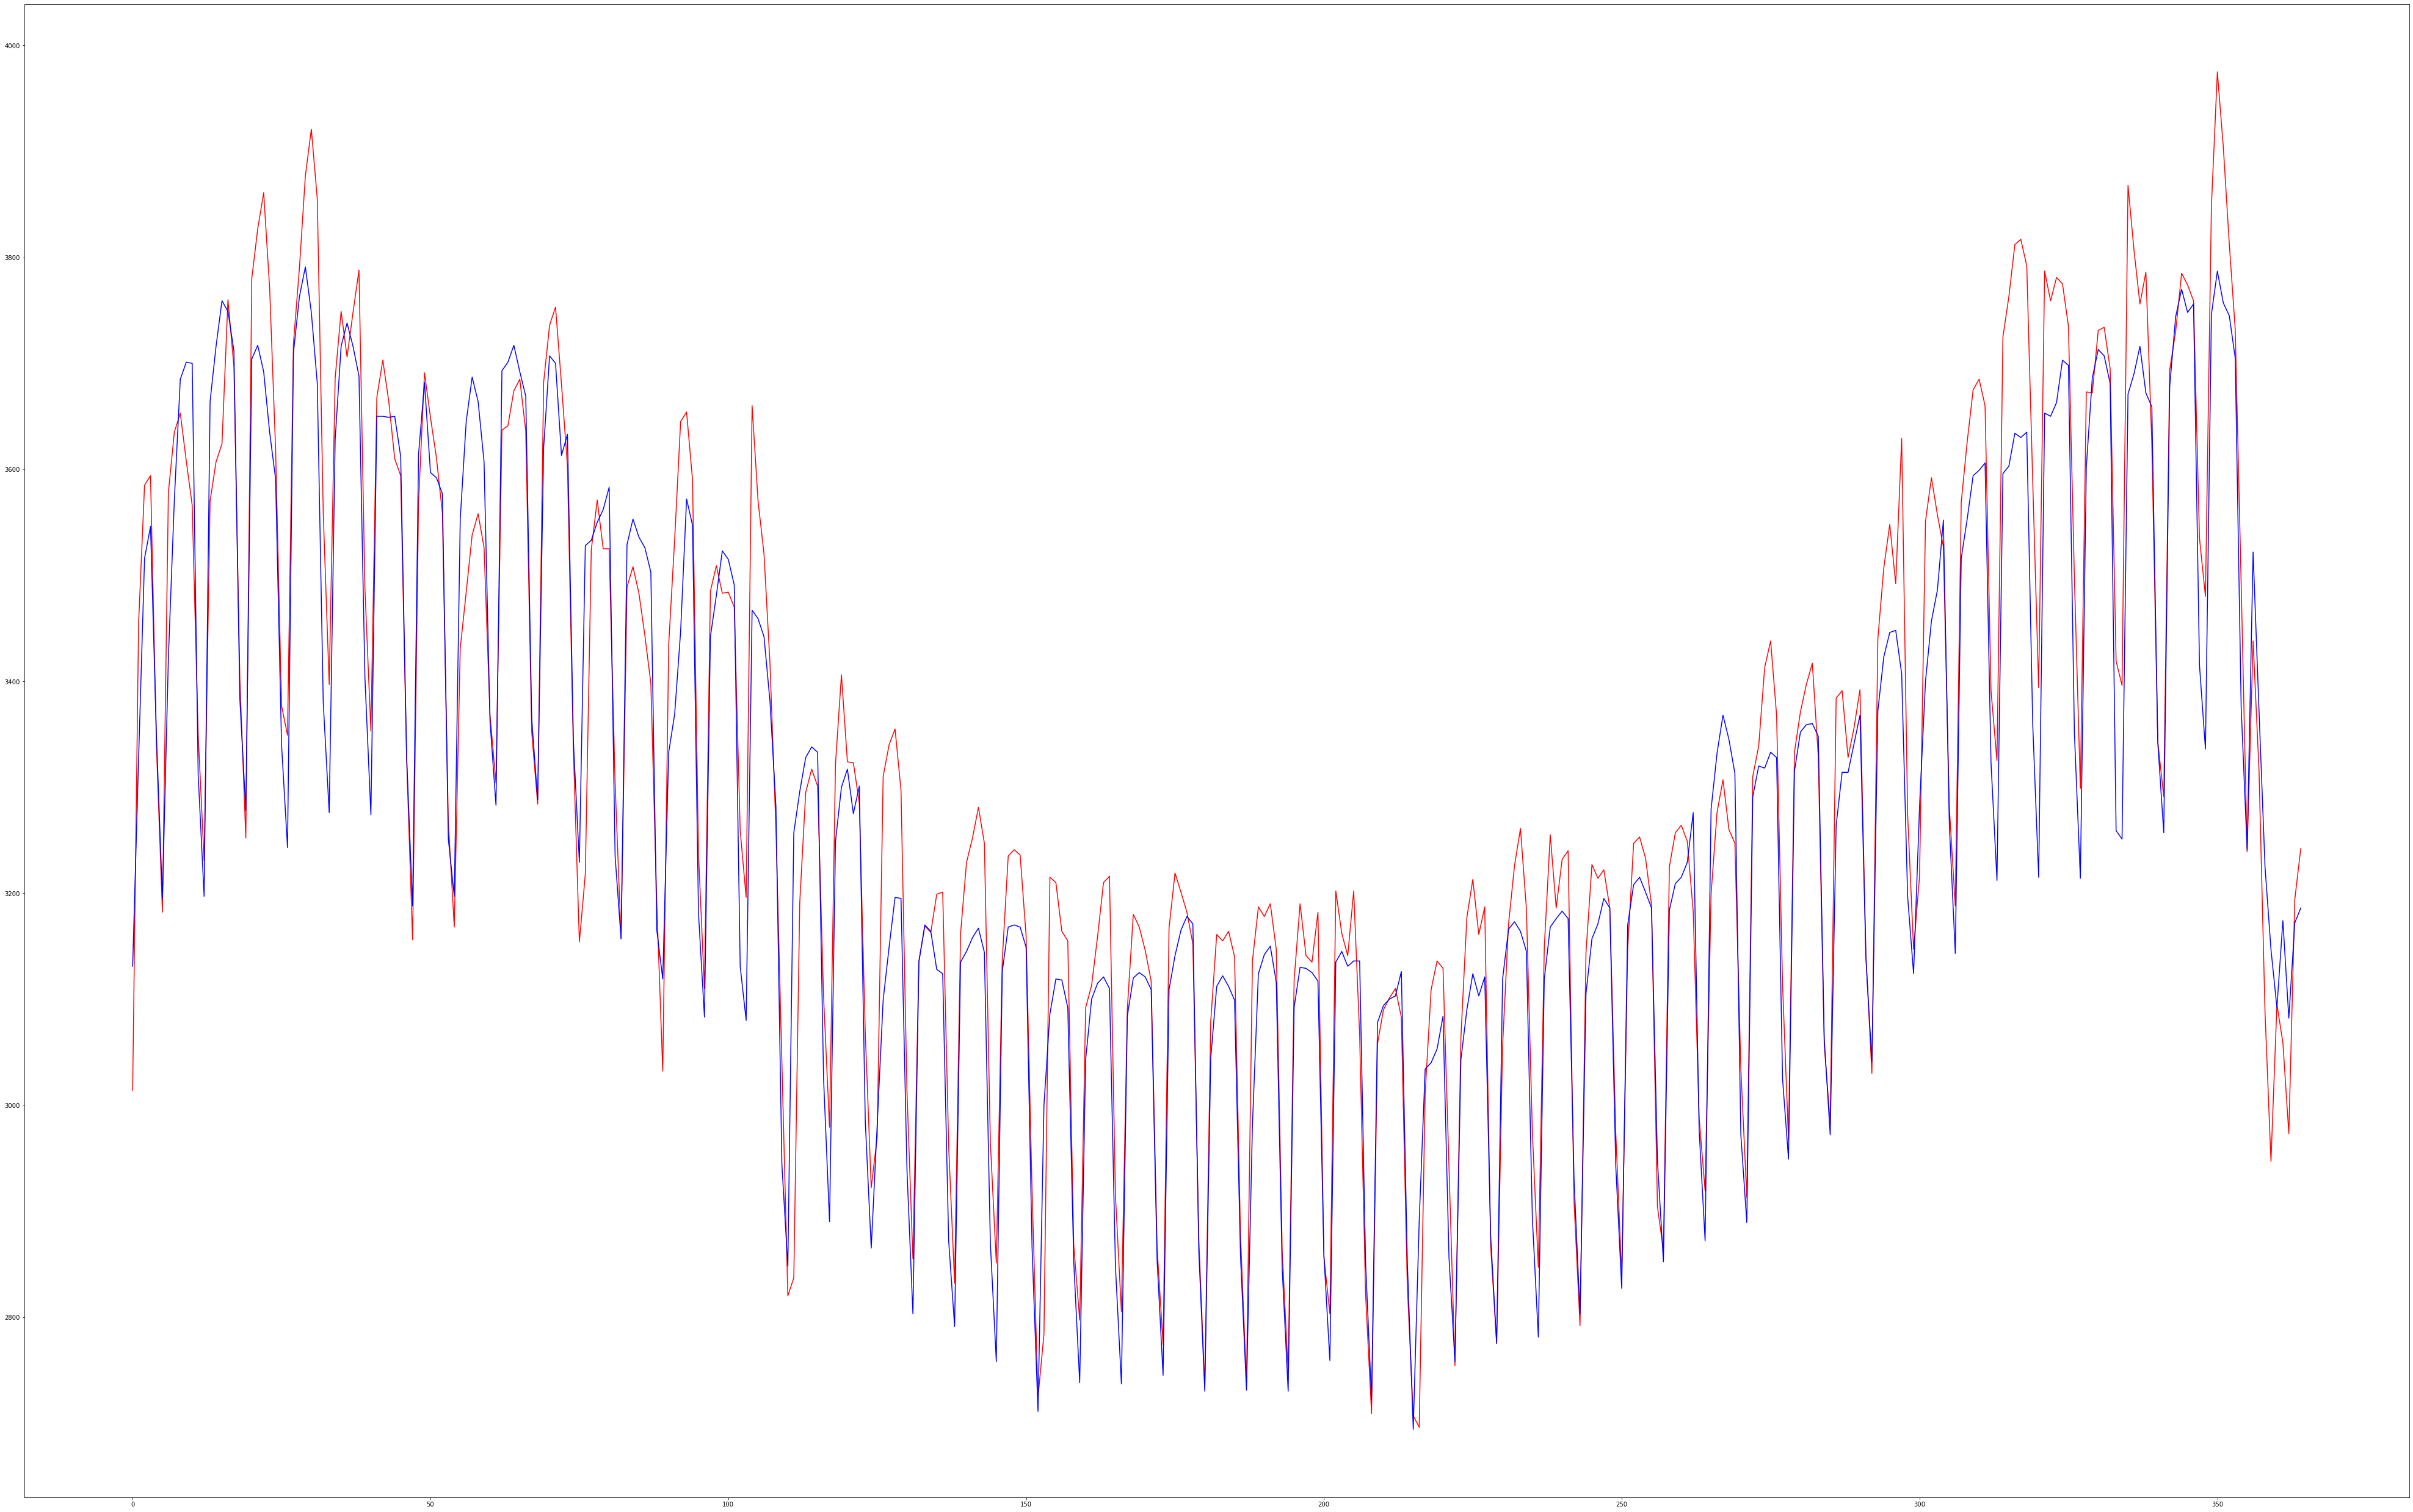

In [29]:
plt.plot(df19['load_actual'] ,'r',df19['load_prediction'] ,'b' )
plt.rcParams['figure.figsize'] = [90, 25]
plt.show()

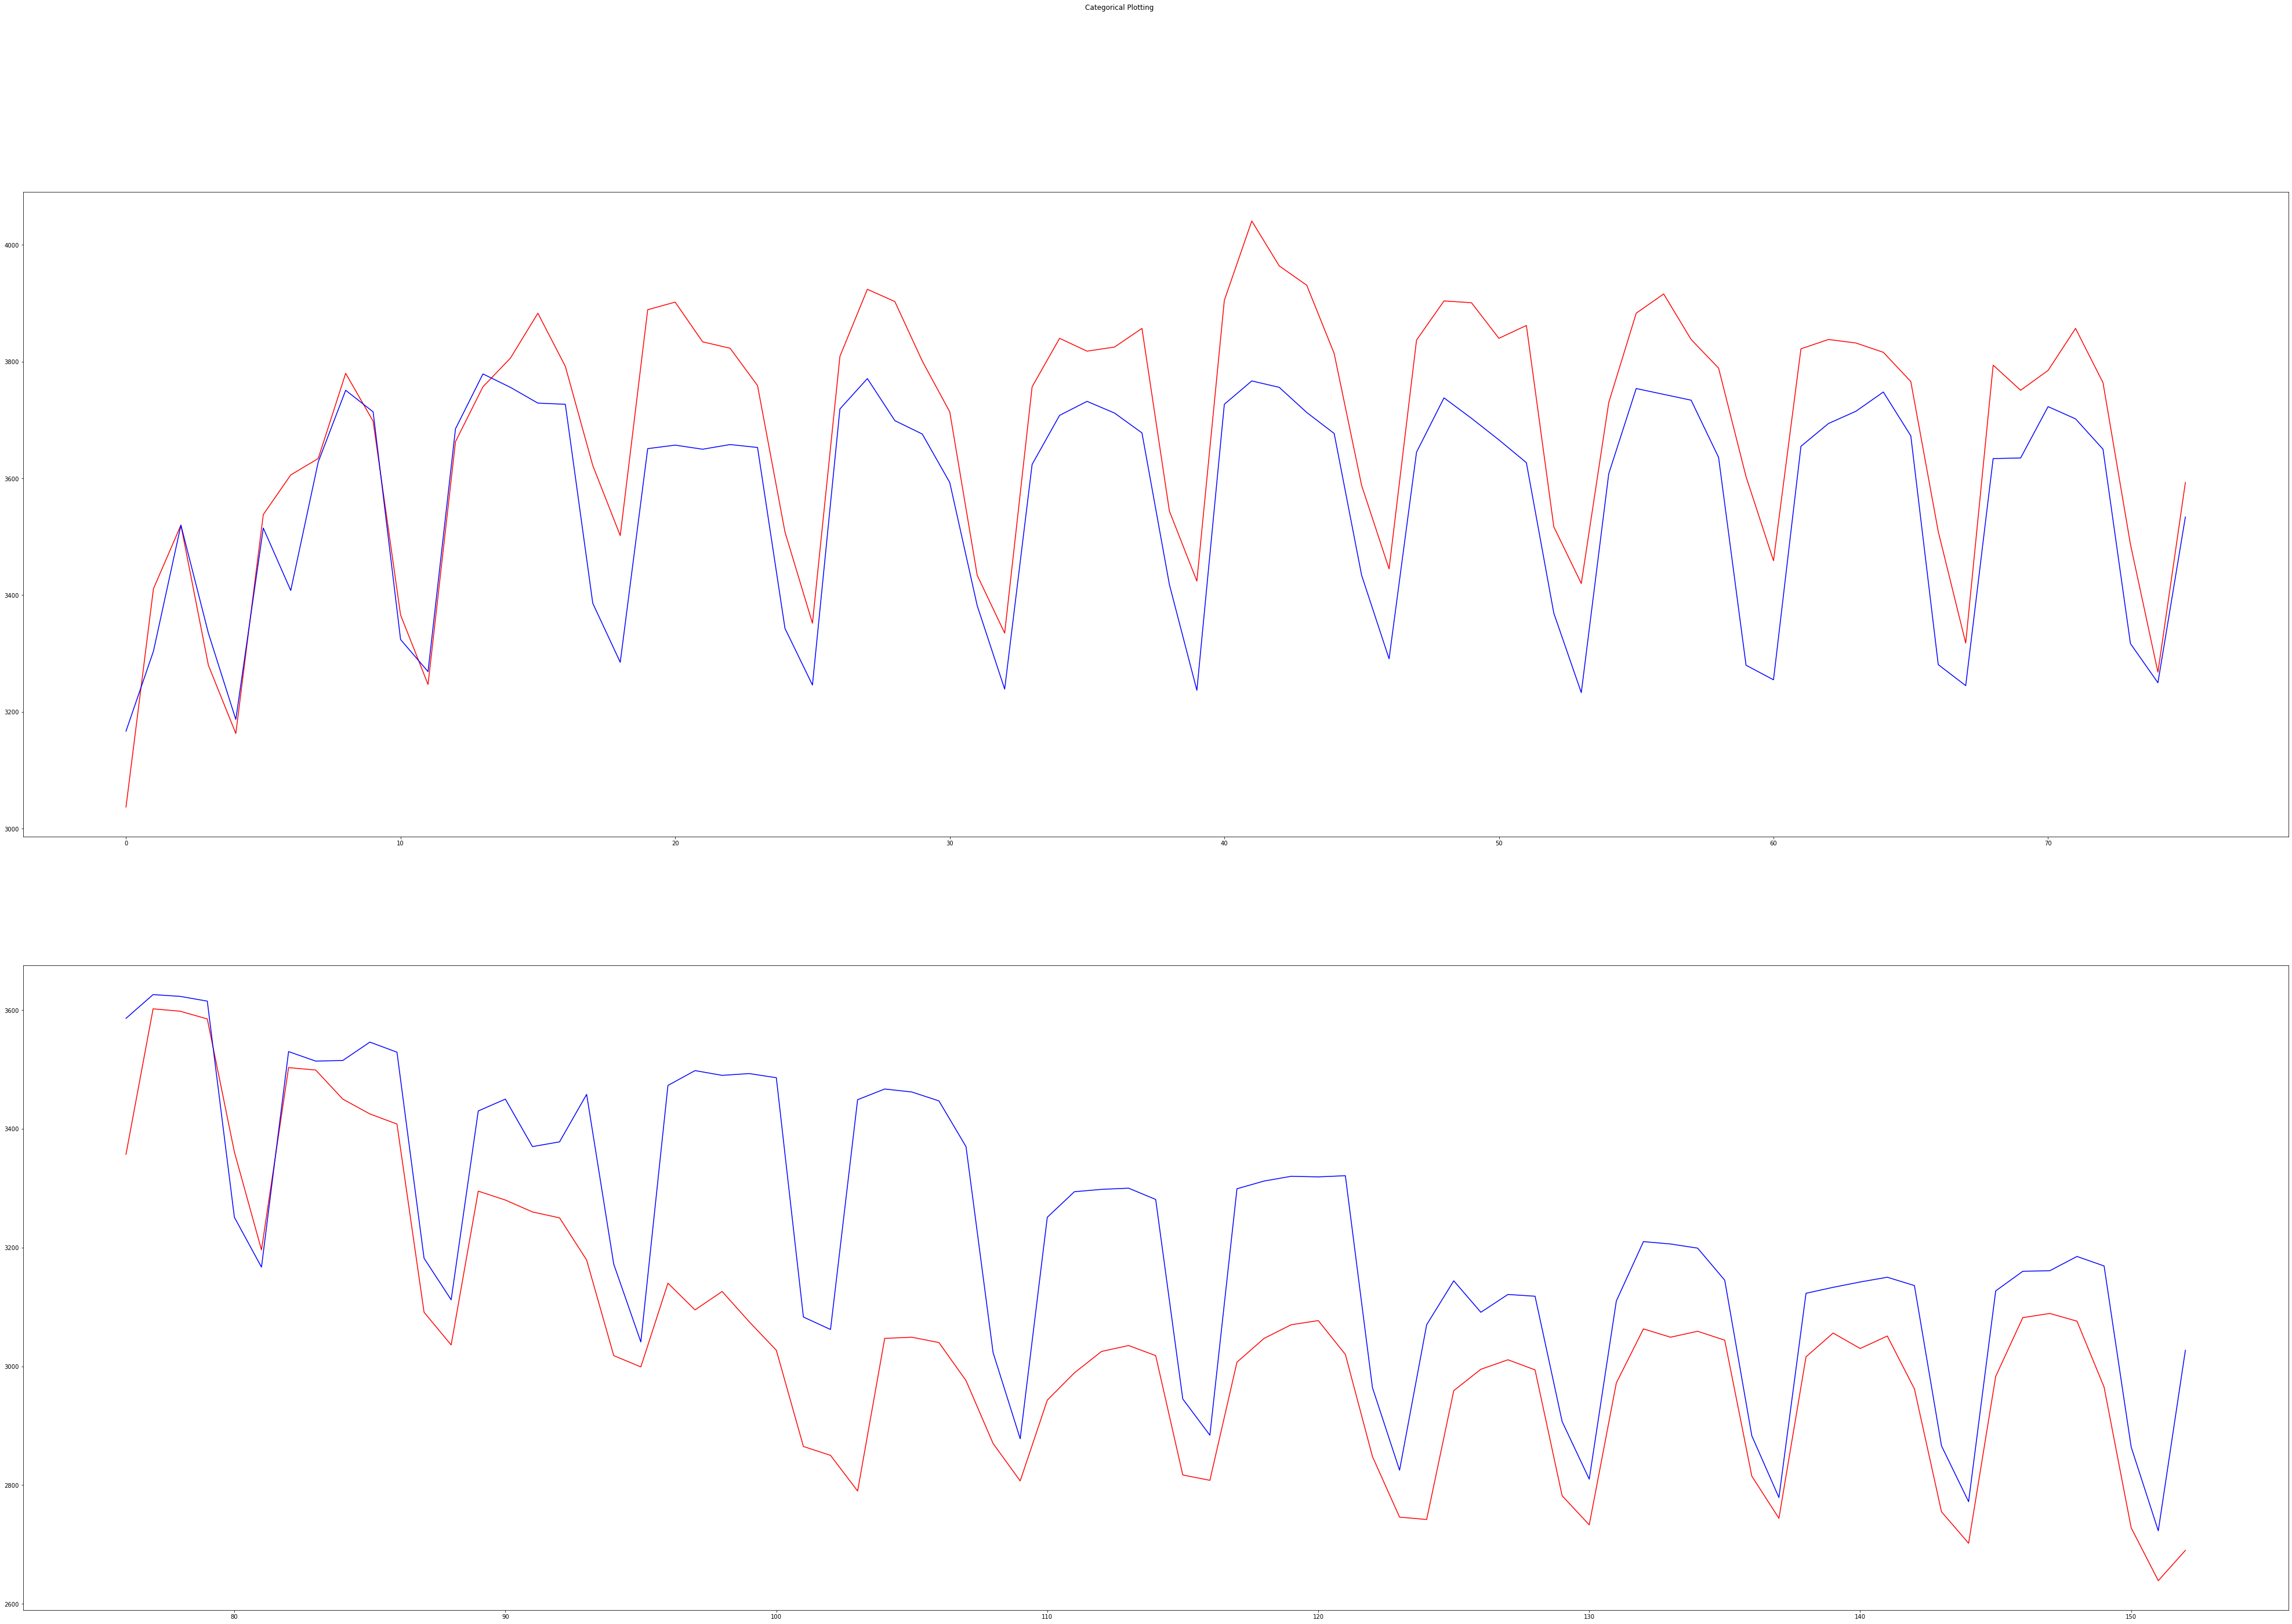

In [24]:
#2020 half

x_data = df20['load_actual']
y_data = df20['load_prediction']


janjun_act, juldec_act, janjun_pre, juldec_pre = train_test_split(x_data, y_data ,test_size = 0.5, shuffle=False)


plt.figure()
plt.subplot(211)
plt.plot(janjun_act ,'r', janjun_pre ,'b' )
animated: [True]
label : "Energy consuption of Ireland 2020"
#plt.plot(juldec_act ,'r', juldec_pre ,'b' )
plt.rcParams['figure.figsize'] = [70, 45]
#plt.xlabel('entry a')
#plt.ylabel('entry b')
#plt.axis([0, ])


#no Covid
plt.suptitle('Categorical Plotting')

#2020 2nd half
#most covid-19 impact

plt.subplot(212)
plt.plot(juldec_act ,'r', juldec_pre ,'b' )
animated: [True]
label : "Energy consuption of Ireland 2020"
#plt.plot(juldec_act ,'r', juldec_pre ,'b' )
plt.rcParams['figure.figsize'] = [70, 45]
plt.show()


# covid Hit
#blue = predited actual
#red = covid affectd consumption 

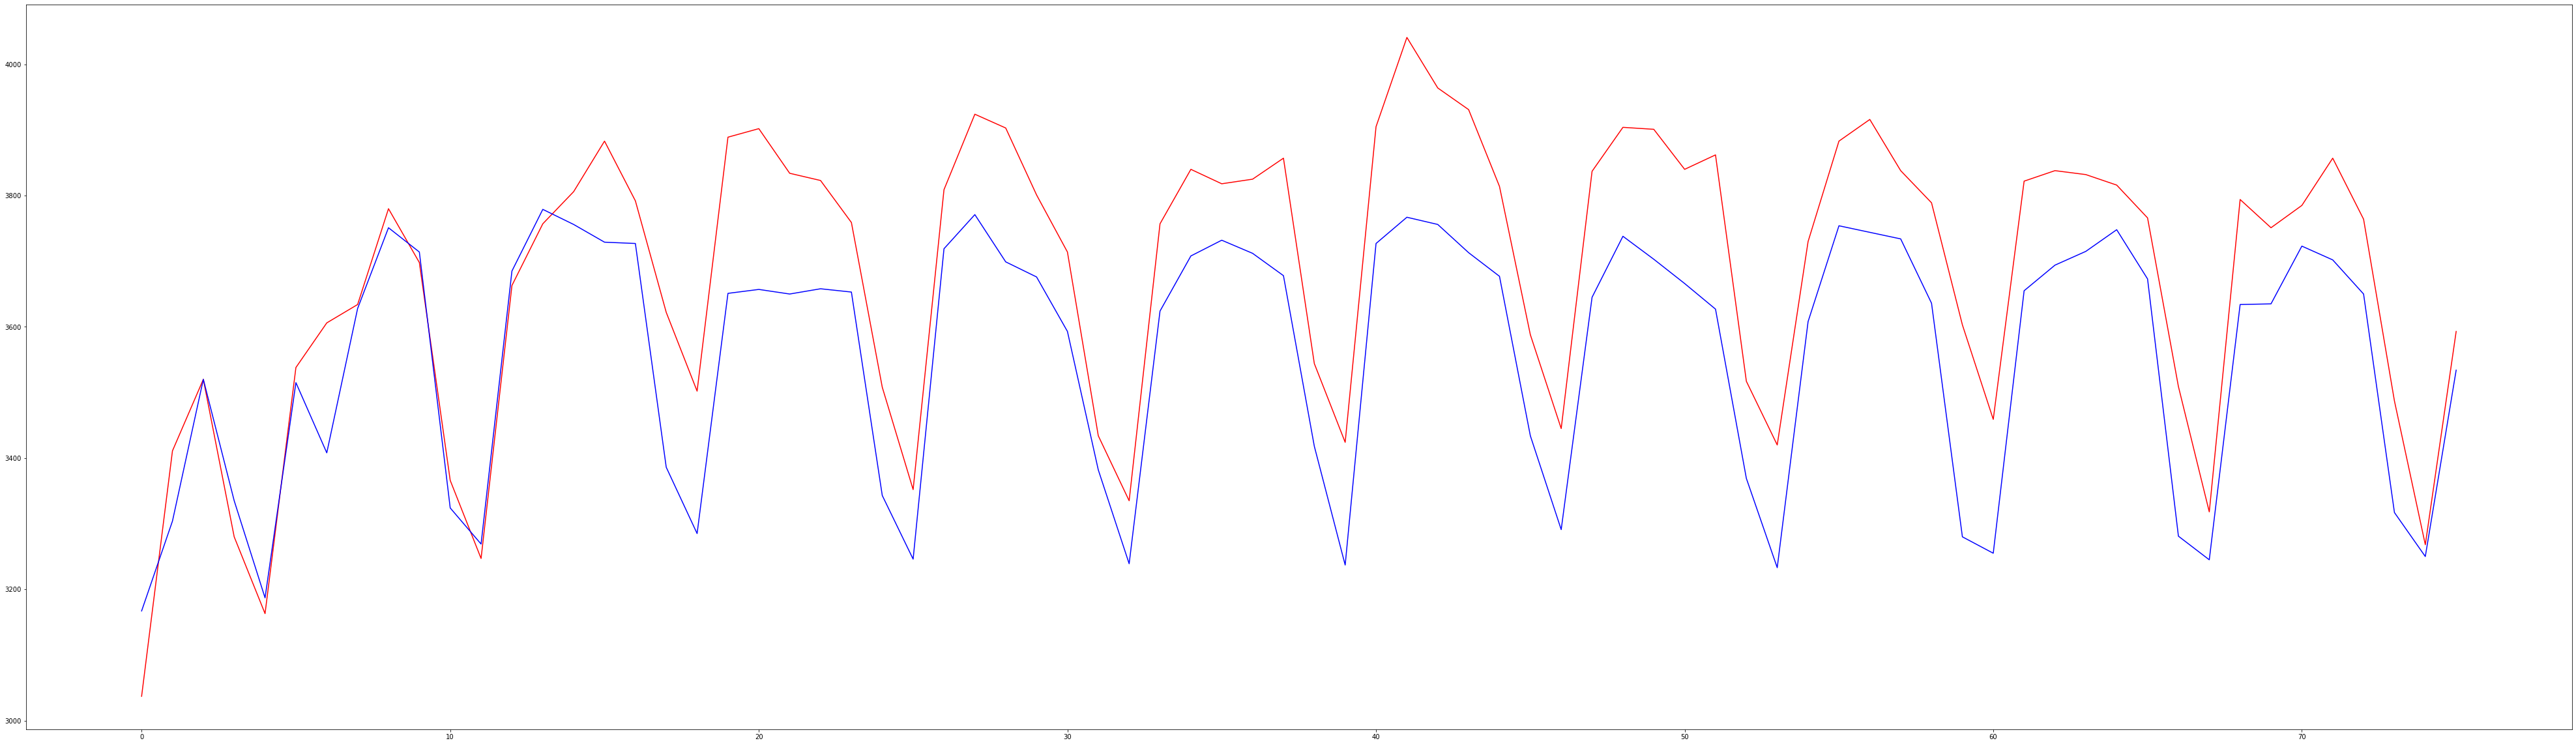

In [25]:
#2020 half

x_data = df20['load_actual']
y_data = df20['load_prediction']


janjun_act, juldec_act, janjun_pre, juldec_pre = train_test_split(x_data, y_data ,test_size = 0.5, shuffle=False)


plt.figure()
plt.subplot(211)
plt.plot(janjun_act ,'r', janjun_pre ,'b' )
animated: [True]
label : "Energy consuption of Ireland 2020"
#plt.plot(juldec_act ,'r', juldec_pre ,'b' )
plt.rcParams['figure.figsize'] = [70, 45]
#plt.xlabel('entry a')
#plt.ylabel('entry b')
#plt.axis([0, ])
plt.show()

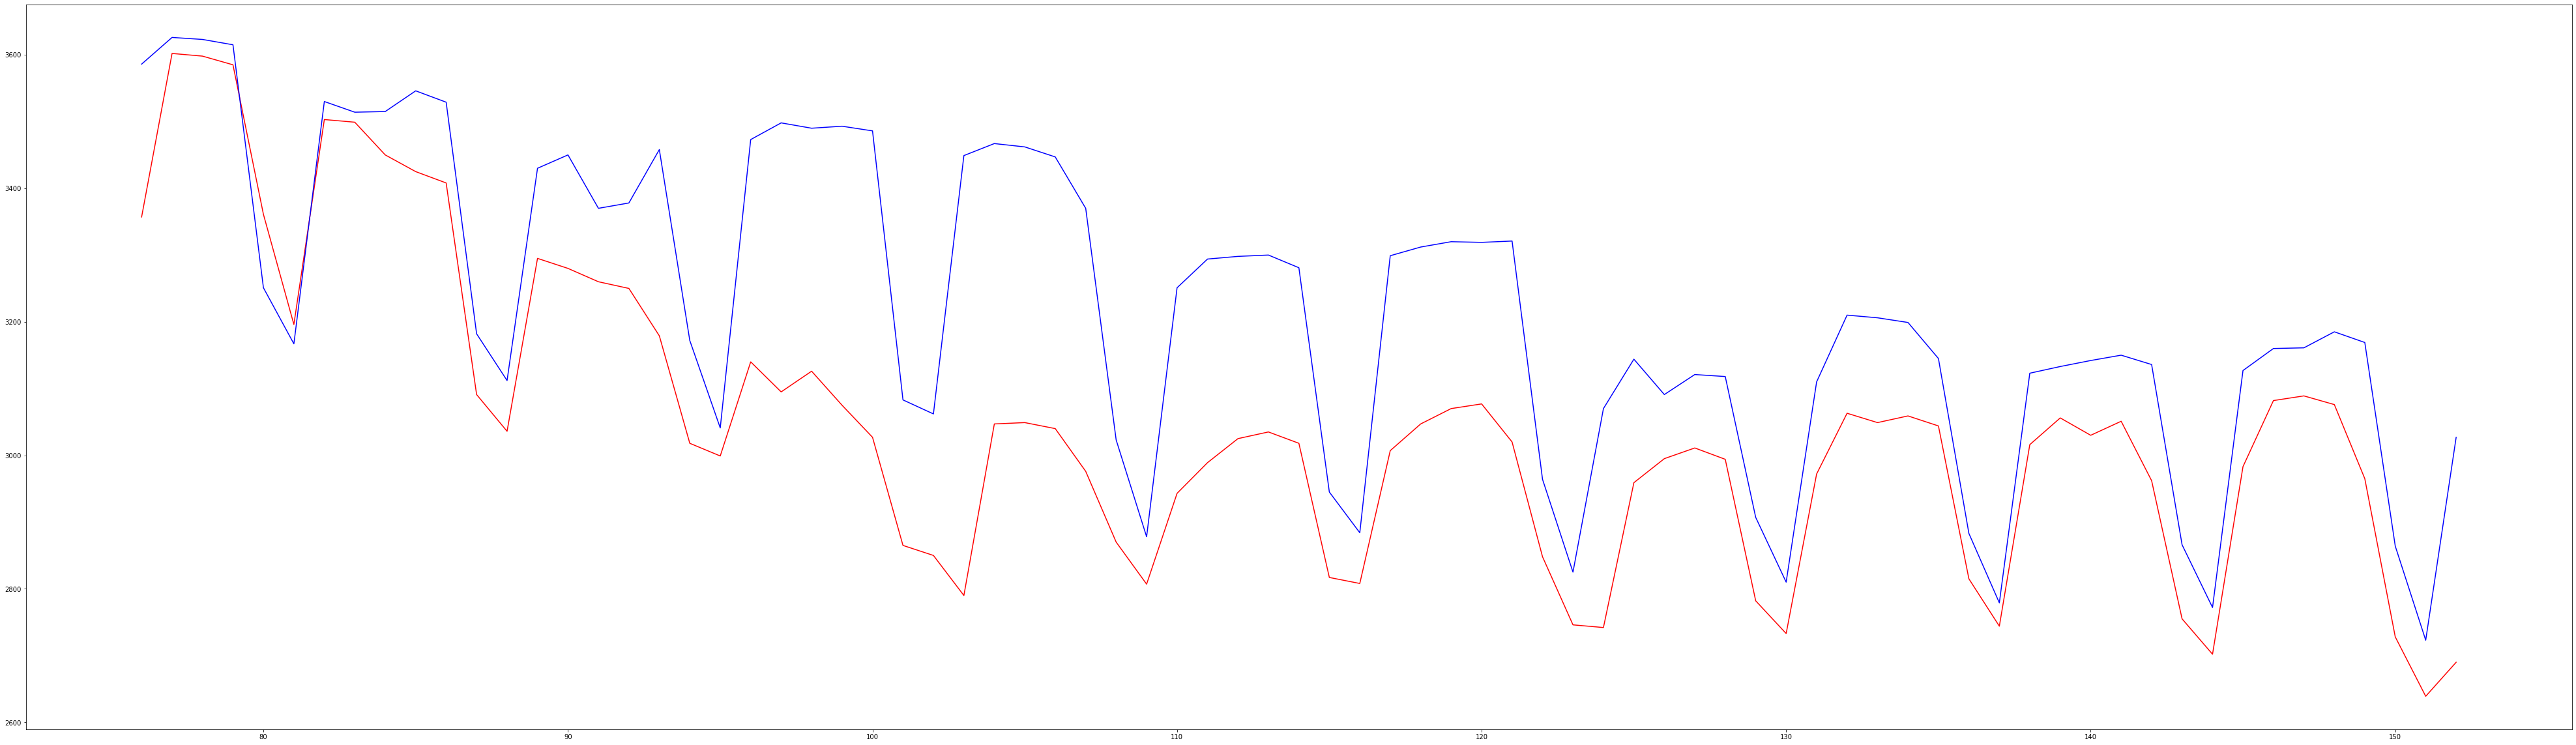

In [26]:

#2020 2nd half
#most covid-19 impact

plt.subplot(212)
plt.plot(juldec_act ,'r', juldec_pre ,'b' )
animated: [True]
label : "Energy consuption of Ireland 2020"
#plt.plot(juldec_act ,'r', juldec_pre ,'b' )
plt.rcParams['figure.figsize'] = [70, 45]
plt.show()


# covid Hit
#blue = predited actual
#red = covid affectd consumption 

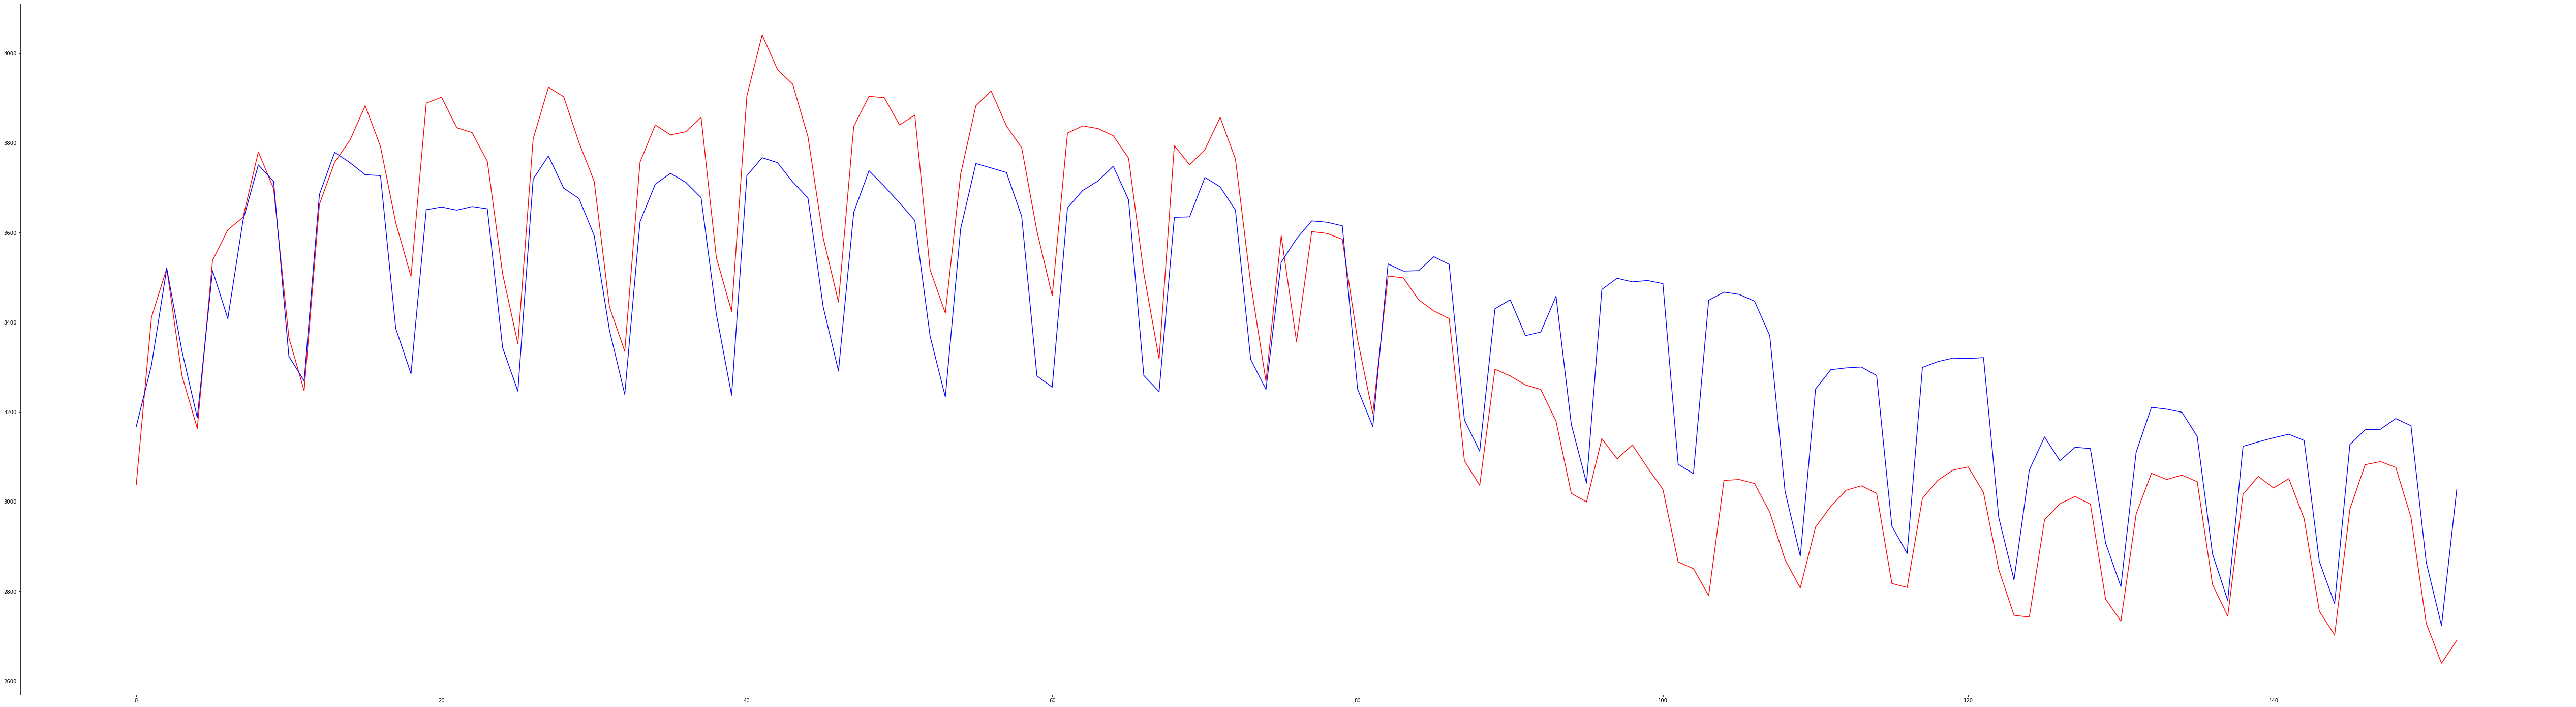

In [30]:
#2020
plt.plot(df20.load_actual ,'r', df20.load_prediction ,'b' )
plt.rcParams['figure.figsize'] = [110, 25]
plt.show()

#red = covid affected load
#blue = load according to previous trends